## Using the Matrix Inverse Method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [11]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [13]:
A_tensor = tf.constant(A)        # A是array，转为tensor  100*2
b_tensor = tf.constant(b)        # 100*1

In [15]:
# 解了一个方程组 Ax=b
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)

slope: 0.943176183613
y_intercept: 0.0511380419923


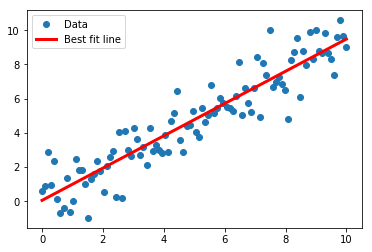

In [19]:
with tf.Session() as sess:
    solution_eval = sess.run(solution)
    slope = solution_eval[0][0]
    y_intercept = solution_eval[1][0]
    print('slope: ' + str(slope))
    print('y_intercept: ' + str(y_intercept))
    # 画出最佳拟合直线
    best_fit = []
    for i in x_vals:
        best_fit.append(slope*i+y_intercept)
    plt.plot(x_vals, y_vals, 'o', label='Data')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.show()

## Implementing a Decomposition Method

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

In [22]:
ops.reset_default_graph()     # 清理一下graph

In [23]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [24]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [25]:
# 矩阵分解 求解方程组
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b)
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

slope: 0.983092472509
y_intercept: 0.0543429730828


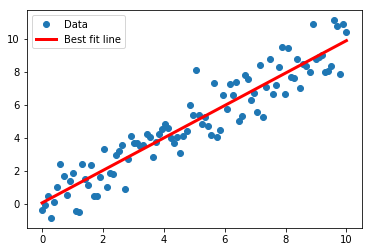

In [27]:
with tf.Session() as sess:
    solution_eval1 = sess.run(sol2)
    slope = solution_eval1[0][0]
    y_intercept = solution_eval1[1][0]
    print('slope: ' + str(slope))
    print('y_intercept: ' + str(y_intercept))
    # 画出最佳拟合曲线
    best_fit = []
    for i in x_vals:
        best_fit.append(slope*i + y_intercept)
    plt.plot(x_vals, y_vals, 'o', label='Data')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.show()

## The TensorFlow Way 

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets

In [29]:
ops.reset_default_graph()

In [30]:
iris = datasets.load_iris()

In [31]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [37]:
learning_rate = 0.05
batch_size = 25
#占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
#变量-学习参数
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [39]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [40]:
# 损失函数和优化器
loss = tf.reduce_mean(tf.square(y_target - model_output))
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [41]:
init = tf.global_variables_initializer()

Step # 25 A = [[ 1.71326315]] b = [[ 3.46515584]]
Loss = 0.675723
Step # 50 A = [[ 1.39803934]] b = [[ 3.99128628]]
Loss = 0.596861
Step # 75 A = [[ 1.19008291]] b = [[ 4.33915186]]
Loss = 0.304545
Step # 100 A = [[ 1.07072341]] b = [[ 4.51651001]]
Loss = 0.155133


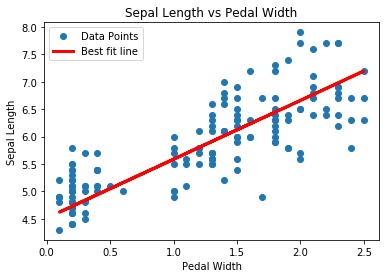

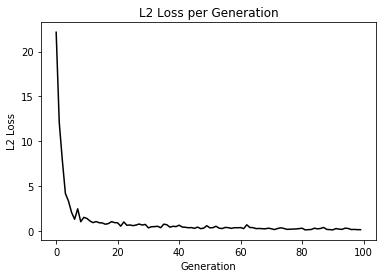

In [50]:
with tf.Session() as sess:
    loss_vec = []
    sess.run(init)
    for i in range(100):
        rand_index = np.random.choice(len(x_vals), size=batch_size)       # 150随机挑出25个，作为一个batch
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        if (i+1)%25 == 0:
            print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    # 画拟合曲线和散点图
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)
    best_fit = []
    for i in x_vals:
        best_fit.append(slope*i+y_intercept)
    plt.plot(x_vals, y_vals, 'o', label='Data Points')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Sepal Length vs Pedal Width')
    plt.xlabel('Pedal Width')
    plt.ylabel('Sepal Length')
    plt.show()
    # 画损失曲线
    plt.plot(loss_vec, 'k-')
    plt.title('L2 Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('L2 Loss')
    plt.show()

## Loss Function

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets

In [57]:
ops.reset_default_graph()

In [58]:
iris = datasets.load_iris()

In [59]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [60]:
learning_rate = 0.05
batch_size = 25
#占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
#变量-学习参数
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [61]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [71]:
# 损失函数和优化器
loss = tf.reduce_mean(tf.abs(y_target - model_output))
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [72]:
init = tf.global_variables_initializer()

Step # 25 A = [[ 1.76314676]] b = [[ 2.11634803]]
Loss = 1.62503
Step # 50 A = [[ 2.141747]] b = [[ 2.77434707]]
Loss = 1.09415
Step # 75 A = [[ 1.98414683]] b = [[ 3.10834646]]
Loss = 0.992433
Step # 100 A = [[ 1.73714662]] b = [[ 3.42634583]]
Loss = 0.724286


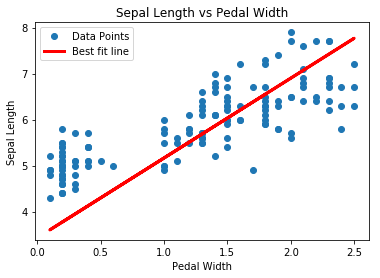

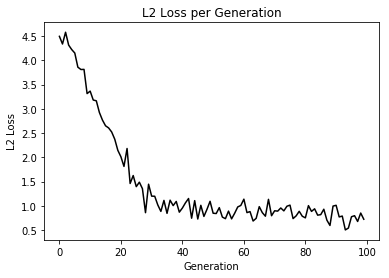

In [73]:
with tf.Session() as sess:
    loss_vec = []
    sess.run(init)
    for i in range(100):
        rand_index = np.random.choice(len(x_vals), size=batch_size)       # 150随机挑出25个，作为一个batch
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        if (i+1)%25 == 0:
            print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    # 画拟合曲线和散点图
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)
    best_fit = []
    for i in x_vals:
        best_fit.append(slope*i+y_intercept)
    plt.plot(x_vals, y_vals, 'o', label='Data Points')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Sepal Length vs Pedal Width')
    plt.xlabel('Pedal Width')
    plt.ylabel('Sepal Length')
    plt.show()
    # 画损失曲线
    plt.plot(loss_vec, 'k-')
    plt.title('L2 Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('L2 Loss')
    plt.show()

Step # 25 A = [[ 2.33570766]] b = [[ 2.51932263]]
Loss = 0.417507
Step # 50 A = [[ 2.38486218]] b = [[ 2.6788094]]
Loss = 0.384689
Step # 75 A = [[ 2.33195901]] b = [[ 2.77736259]]
Loss = 0.379233
Step # 100 A = [[ 2.21810436]] b = [[ 2.83261585]]
Loss = 0.43416
Step # 125 A = [[ 2.20618176]] b = [[ 2.98239422]]
Loss = 0.340094
Step # 150 A = [[ 2.15484977]] b = [[ 3.11106062]]
Loss = 0.40118
Step # 175 A = [[ 2.05102992]] b = [[ 3.20652294]]
Loss = 0.369749
Step # 200 A = [[ 1.98962438]] b = [[ 3.33615637]]
Loss = 0.359818
Step # 225 A = [[ 1.9117986]] b = [[ 3.47435856]]
Loss = 0.283409
Step # 250 A = [[ 1.73766494]] b = [[ 3.55754471]]
Loss = 0.380045


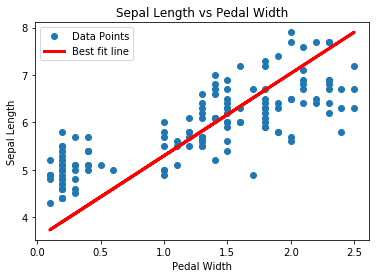

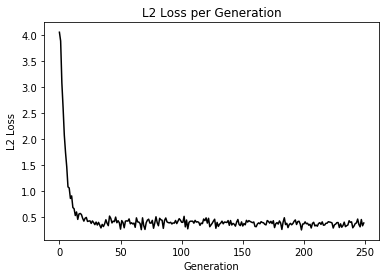

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets

ops.reset_default_graph()
# 数据
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
# 超参数
learning_rate = 0.1
batch_size = 25
#占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
#变量-学习参数
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

# 损失函数和优化器
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A), 1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    loss_vec = []
    sess.run(init)
    for i in range(250):
        rand_index = np.random.choice(len(x_vals), size=batch_size)       # 150随机挑出25个，作为一个batch
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        if (i+1)%25 == 0:
            print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    # 画拟合曲线和散点图
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)
    best_fit = []
    for i in x_vals:
        best_fit.append(slope*i+y_intercept)
    plt.plot(x_vals, y_vals, 'o', label='Data Points')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Sepal Length vs Pedal Width')
    plt.xlabel('Pedal Width')
    plt.ylabel('Sepal Length')
    plt.show()
    # 画损失曲线
    plt.plot(loss_vec, 'k-')
    plt.title('L2 Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('L2 Loss')
    plt.show()

## Lasso and Ridge Regression

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets

ops.reset_default_graph()
# 数据
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
# 超参数
learning_rate = 0.001
batch_size = 50
#占位符
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
#变量-学习参数
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [165]:
# 损失函数(+正则化项)和优化器
# lasso_param = tf.constant(0.9)
# heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-100., tf.subtract(A, lasso_param)))))
# regularization_param = tf.multiply(heavyside_step, 99.)
# loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)
ridge_param = tf.constant(1.)
ridge_loss = tf.reduce_mean(tf.square(A))
loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)
# 初始化变量
init = tf.global_variables_initializer()

Step # 300 A = [[ 1.63901758]] b = [[ 1.89672434]]
Loss = [ 7.3211937]
Step # 600 A = [[ 1.51822531]] b = [[ 2.81664848]]
Loss = [ 4.09058952]
Step # 900 A = [[ 1.25540042]] b = [[ 3.44096255]]
Loss = [ 2.8272686]
Step # 1200 A = [[ 1.04367304]] b = [[ 3.91040349]]
Loss = [ 1.75451982]
Step # 1500 A = [[ 0.88185155]] b = [[ 4.26877165]]
Loss = [ 1.17012835]


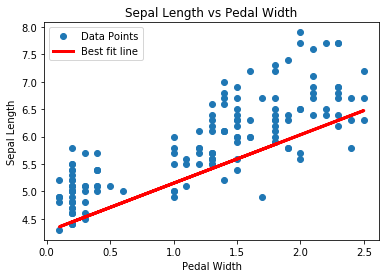

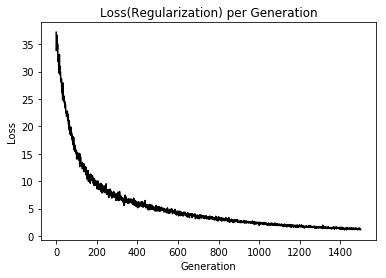

In [166]:
# 运行，执行计算图
with tf.Session() as sess:
    loss_vec = []
    sess.run(init)
    for i in range(1500):
        rand_index = np.random.choice(len(x_vals), size=batch_size)       # 150随机挑出25个，作为一个batch
        rand_x = np.transpose([x_vals[rand_index]])
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss[0])
        if (i+1)%300 == 0:
            print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    # 画拟合曲线和散点图
    [slope] = sess.run(A)
    [y_intercept] = sess.run(b)
    best_fit = []
    for i in x_vals:
        best_fit.append(slope*i+y_intercept)
    plt.plot(x_vals, y_vals, 'o', label='Data Points')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.title('Sepal Length vs Pedal Width')
    plt.xlabel('Pedal Width')
    plt.ylabel('Sepal Length')
    plt.show()
    # 画损失曲线
    plt.plot(loss_vec, 'k-')
    plt.title('Loss(Regularization) per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.show()

## Elastic Net Regression 

In [148]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn import datasets

ops.reset_default_graph()
# 数据
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
# 超参数
learning_rate = 0.001
batch_size = 50
#占位符
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
#变量-学习参数
A = tf.Variable(tf.random_normal(shape=[3,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.add(tf.matmul(x_data, A), b)

In [149]:
elastic_param1 = tf.constant(1.)
elastic_param2 = tf.constant(1.)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)
# 初始化变量
init = tf.global_variables_initializer()

Step # 250 A = [[ 0.80842412]
 [ 0.61371338]
 [ 0.43397573]] b = [[ 0.27317223]]
Loss = [ 1.51550496]
Step # 500 A = [[ 0.9405427 ]
 [ 0.54271638]
 [ 0.27363154]] b = [[ 0.38926274]]
Loss = [ 1.24933076]
Step # 750 A = [[ 0.97108257]
 [ 0.53495759]
 [ 0.16876879]] b = [[ 0.48246419]]
Loss = [ 1.24830818]
Step # 1000 A = [[ 0.96656483]
 [ 0.54910308]
 [ 0.09368915]] b = [[ 0.56621349]]
Loss = [ 1.11517763]


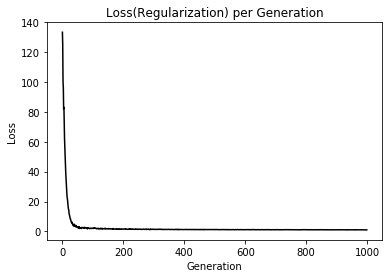

In [155]:
# 运行，执行计算图
with tf.Session() as sess:
    loss_vec = []
    sess.run(init)
    for i in range(1000):
        rand_index = np.random.choice(len(x_vals), size=batch_size)       # 150随机挑出50个，作为一个batch
        rand_x = x_vals[rand_index]
        rand_y = np.transpose([y_vals[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss[0])
        if (i+1)%250 == 0:
            print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
            print('Loss = ' + str(temp_loss))
    # 画损失曲线
    plt.plot(loss_vec, 'k-')
    plt.title('Loss(Regularization) per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Loss')
    plt.show()

# Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from sklearn import datasets
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops

In [2]:
ops.reset_default_graph()

In [3]:
birthdata_url = 'https://raw.githubusercontent.com/h2oai/h2o-2/master/smalldata/logreg/umass_statdata/lowbwt.dat'   #github raw
birth_file = requests.get(birthdata_url)
birth_data = birth_file.text.split('\n')[3:-2]

In [4]:
birth_data

['  ID    LOW    AGE    LWT    RACE    SMOKE    PTL    HT    UI    FTV     BWT',
 '  85     0      19    182      2       0       0      0     1     0     2523',
 '  86     0      33    155      3       0       0      0     0     3     2551',
 '  87     0      20    105      1       1       0      0     0     1     2557',
 '  88     0      21    108      1       1       0      0     1     2     2594',
 '  89     0      18    107      1       1       0      0     1     0     2600',
 '  91     0      21    124      3       0       0      0     0     0     2622',
 '  92     0      22    118      1       0       0      0     0     1     2637',
 '  93     0      17    103      3       0       0      0     0     1     2637',
 '  94     0      29    123      1       1       0      0     0     1     2663',
 '  95     0      26    113      1       1       0      0     0     0     2665',
 '  96     0      19     95      3       0       0      0     0     0     2722',
 '  97     0      19    150 

In [5]:
birth_header = [x for x in birth_data[0].split(' ') if len(x) >= 1]
birth_header

['ID', 'LOW', 'AGE', 'LWT', 'RACE', 'SMOKE', 'PTL', 'HT', 'UI', 'FTV', 'BWT']

In [6]:
birth_data2 = [[float(x) for x in y.split(' ') if len(x) >= 1] for y in birth_data[1:] if len(y)>=1]
birth_data2

[[85.0, 0.0, 19.0, 182.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2523.0],
 [86.0, 0.0, 33.0, 155.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2551.0],
 [87.0, 0.0, 20.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2557.0],
 [88.0, 0.0, 21.0, 108.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2594.0],
 [89.0, 0.0, 18.0, 107.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2600.0],
 [91.0, 0.0, 21.0, 124.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2622.0],
 [92.0, 0.0, 22.0, 118.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2637.0],
 [93.0, 0.0, 17.0, 103.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2637.0],
 [94.0, 0.0, 29.0, 123.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2663.0],
 [95.0, 0.0, 26.0, 113.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2665.0],
 [96.0, 0.0, 19.0, 95.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2722.0],
 [97.0, 0.0, 19.0, 150.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2733.0],
 [98.0, 0.0, 22.0, 95.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2750.0],
 [99.0, 0.0, 30.0, 107.0, 3.0, 0.0, 1.0, 0.0, 1.0, 2.0, 2750.0],
 [100.0, 0.0, 18.0, 100.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2769.0],
 [101.0, 0.0, 18.0, 100.0,

In [7]:
y_vals = np.array([x[1] for x in birth_data2])
x_vals = np.array([x[2:9] for x in birth_data2])

In [8]:
y_vals

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [9]:
x_vals

array([[  19.,  182.,    2., ...,    0.,    0.,    1.],
       [  33.,  155.,    3., ...,    0.,    0.,    0.],
       [  20.,  105.,    1., ...,    0.,    0.,    0.],
       ..., 
       [  23.,   94.,    3., ...,    0.,    0.,    0.],
       [  17.,  142.,    2., ...,    0.,    1.,    0.],
       [  21.,  130.,    1., ...,    0.,    1.,    0.]])

In [10]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [11]:
# 训练
x_vals_train = x_vals[train_indices]
y_vals_train = y_vals[train_indices]
# 测试
x_vals_test = x_vals[test_indices]
y_vals_test = y_vals[test_indices]

In [12]:
# 以上数据就准备好了，logistics regression做二分类哈

In [13]:
def normalize_cols(m):
    col_max = m.max(axis=0)     # 按列
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

In [14]:
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [15]:
x_vals_train.shape

(151, 7)

In [16]:
np.transpose([y_vals_train])

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
      

In [17]:
#模型
batch_size = 25
x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[7, 1]))
b = tf.Variable(tf.random_normal(shape=[1, ]))
model_output = tf.add(tf.matmul(x_data, A), b)
#损失函数
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_target, logits=model_output))
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
#初始化变量
init = tf.global_variables_initializer()
#预测
prediction = tf.round(tf.sigmoid(model_output))
prediction_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(prediction_correct)

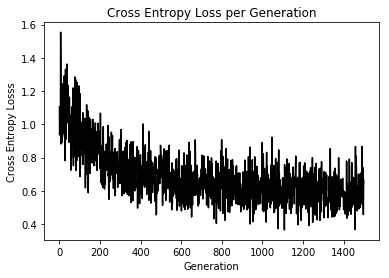

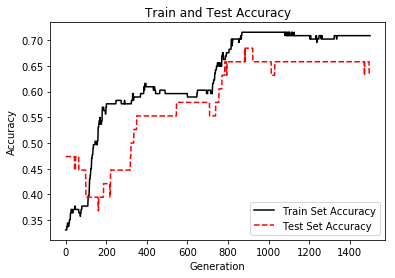

In [19]:
with tf.Session() as sess:
    sess.run(init) 
    loss_vec = []     #损失曲线
    train_acc = []    #训练集准确率曲线
    test_acc = []     #测试集准确率曲线
    for i in range(1500):
        rand_index = np.random.choice(len(x_vals_train), size=batch_size)
        rand_x = x_vals_train[rand_index]
        rand_y = np.transpose([y_vals_train[rand_index]])
        sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
        #损失
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        loss_vec.append(temp_loss)
        #准确率
        temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
        train_acc.append(temp_acc_train)
        temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
        test_acc.append(temp_acc_test)
    #交叉熵损失曲线
    plt.plot(loss_vec, 'k-')
    plt.title('Cross Entropy Loss per Generation')
    plt.xlabel('Generation')
    plt.ylabel('Cross Entropy Losss')
    plt.show()
    #准确率曲线
    plt.plot(train_acc, 'k-', label='Train Set Accuracy')
    plt.plot(test_acc, 'r--', label='Test Set Accuracy')
    plt.title('Train and Test Accuracy')
    plt.xlabel('Generation')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()